In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
import ROOT


plt.rcParams["figure.figsize"] = (10, 8)

Welcome to JupyROOT 6.26/06


In [13]:
#delta theta
def theta_res(E):
    cm=10
    z=-307*cm
    return np.hypot(3.6/np.sqrt(E),0.3)/abs(z)
#delta E/E
def E_res(E):
    return np.hypot(17.4/np.sqrt(E), 0.6)/100

In [16]:
print(f"theta res at 5 GeV:{theta_res(5)}")

theta res at 5 GeV:0.0005334466735096878


In [20]:
#delta E/E
def Q2_res(E, theta, mode="both"):
    if mode == "E only":
        return E_res(E)
    if mode == "theta only":
        return theta_res(E)*np.tan(theta/2)
    return np.hypot(E_res(E), theta_res(E)*np.tan(theta/2))
    

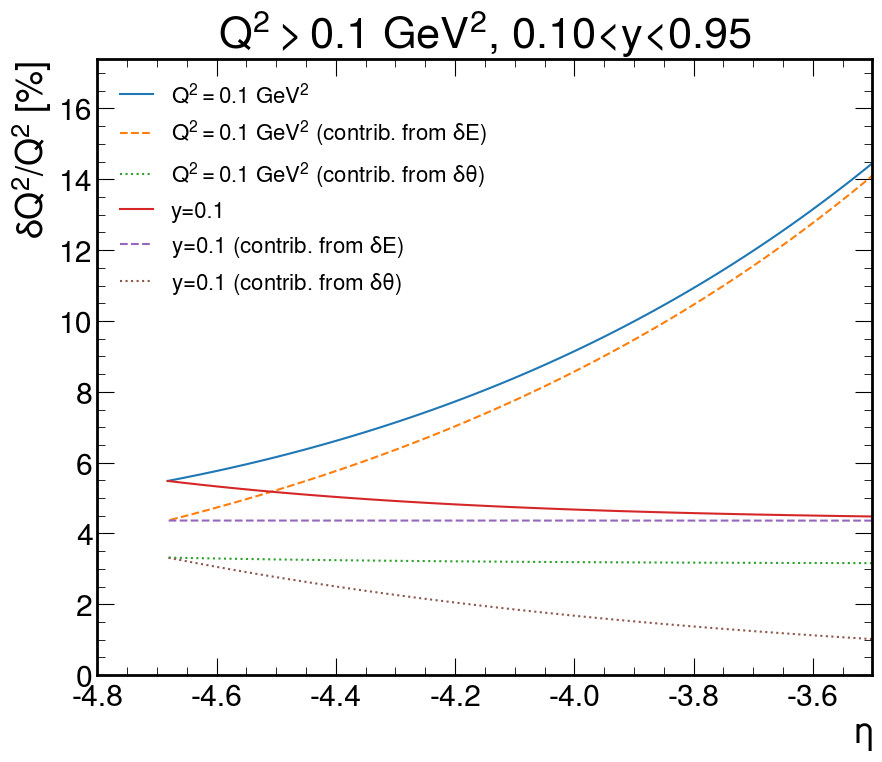

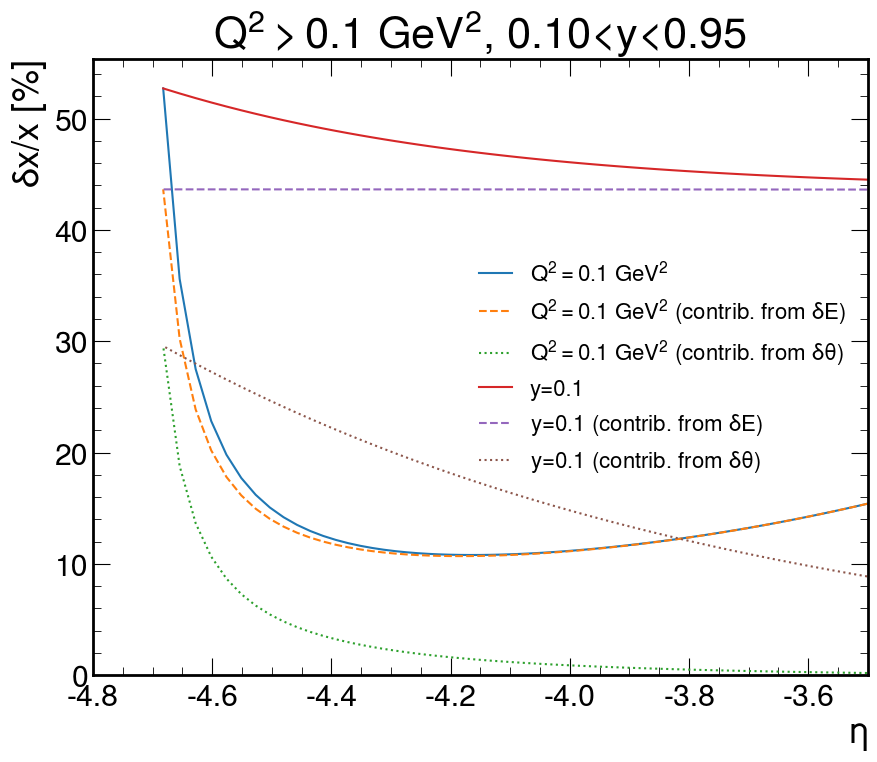

In [66]:
theta=(np.pi/180)*np.linspace(176, 178.939, 100)
eta=-np.log(np.tan(theta/2))

Ebeam=18
Q2min=0.1
ymin=0.1
ymax=0.95

Emin=Q2min/(4*Ebeam*np.cos(theta/2)**2)
#Emin_from_y=(1-ymax)*2*Ebeam/(1-np.cos(theta))


Emax=(1-ymin)*2*Ebeam/(1-np.cos(theta))
#print(sum(Emin_from_y<Emin))



plt.plot(eta,Q2_res(Emin, theta)*100, label='$Q^2=0.1$ GeV$^2$')
plt.plot(eta,Q2_res(Emin, theta, "E only")*100, ls='--', label='$Q^2=0.1$ GeV$^2$ (contrib. from $\delta E$)')
plt.plot(eta,Q2_res(Emin, theta, "theta only")*100, ls=':', label='$Q^2=0.1$ GeV$^2$ (contrib. from $\delta \\theta$)')


plt.plot(eta,Q2_res(Emax, theta)*100, label='y=0.1')
plt.plot(eta,Q2_res(Emax, theta, "E only")*100, ls='--', label='y=0.1 (contrib. from $\delta E$)')
plt.plot(eta,Q2_res(Emax, theta, "theta only")*100, ls=':', label='y=0.1 (contrib. from $\delta \\theta$)')

plt.xlabel("$\eta$")
plt.ylabel("$\delta Q^2/Q^2$ [%]")
plt.xlim(-4.8, -3.5)
plt.ylim(0)
plt.legend(fontsize=16)
plt.title("$Q^2>0.1$ GeV$^2$, 0.10<y<0.95")
plt.savefig("images/Q2_res_at_min_Q2.pdf")

plt.show()

plt.plot(eta,x_res(Emin, theta)*100, label='$Q^2=0.1$ GeV$^2$')
plt.plot(eta,x_res(Emin, theta, "E only")*100, ls='--', label='$Q^2=0.1$ GeV$^2$ (contrib. from $\delta E$)')
plt.plot(eta,x_res(Emin, theta, "theta only")*100, ls=':', label='$Q^2=0.1$ GeV$^2$ (contrib. from $\delta \\theta$)')

plt.plot(eta,x_res(Emax, theta)*100, label='y=0.1')
plt.plot(eta,x_res(Emax, theta, "E only")*100, ls='--', label='y=0.1 (contrib. from $\delta E$)')
plt.plot(eta,x_res(Emax, theta, "theta only")*100, ls=':', label='y=0.1 (contrib. from $\delta \\theta$)')


plt.xlim(-4.8, -3.5)
plt.ylim(0)
plt.legend(fontsize=16)
plt.title("$Q^2>0.1$ GeV$^2$, 0.10<y<0.95")
plt.xlabel("$\eta$")
plt.ylabel("$\delta x/x$ [%]")
plt.savefig("images/x_res_at_min_Q2.pdf")

In [63]:
#delta E/E
def x_res(E, theta, mode="both", Ebeam=18):
    y= (2*Ebeam+E*(np.cos(theta)-1))/(2*Ebeam)
    if mode == "E only":
        return abs(E_res(E)/y)
    if mode == "theta only":
        return abs(theta_res(E)*(1-E/Ebeam*np.tan(theta/2))/y)
    return np.hypot(E_res(E)/y, theta_res(E)*(1-E/Ebeam*np.tan(theta/2))/y)
    

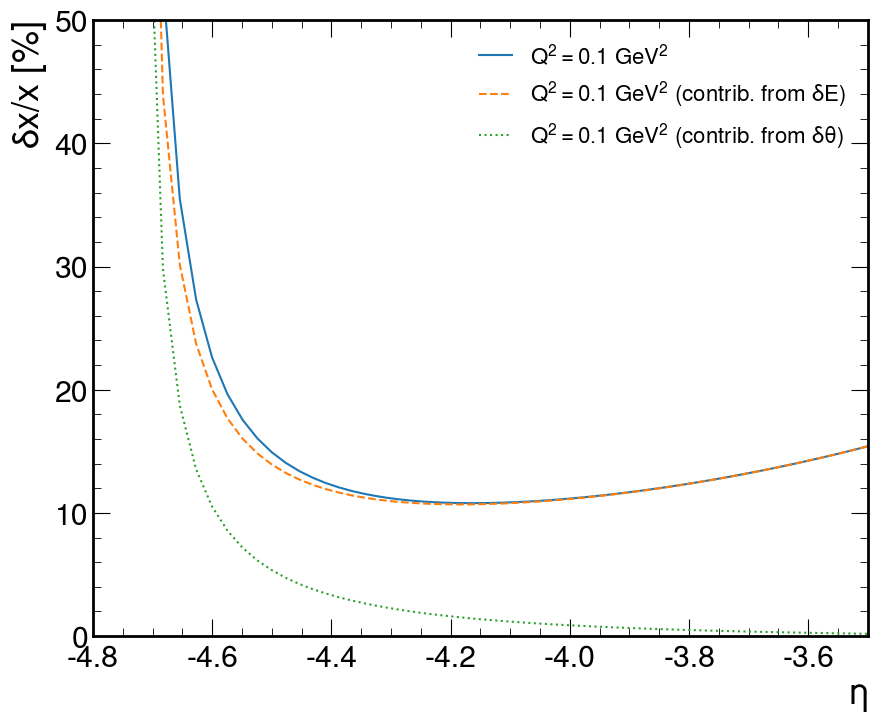

In [43]:
theta=(np.pi/180)*np.linspace(176, 179, 100)
eta=-np.log(np.tan(theta/2))

Ebeam=18
Q2min=0.1
Emin=Q2min/(4*Ebeam*np.cos(theta/2)**2)

plt.plot(eta,x_res(Emin, theta)*100, label='$Q^2=0.1$ GeV$^2$')
plt.plot(eta,x_res(Emin, theta, "E only")*100, ls='--', label='$Q^2=0.1$ GeV$^2$ (contrib. from $\delta E$)')
plt.plot(eta,x_res(Emin, theta, "theta only")*100, ls=':', label='$Q^2=0.1$ GeV$^2$ (contrib. from $\delta \\theta$)')
plt.xlabel("$\eta$")
plt.ylabel("$\delta x/x$ [%]")
plt.xlim(-4.8, -3.5)
plt.ylim(0,50)
plt.legend(fontsize=16)
plt.savefig("images/x_res_at_min_Q2.pdf")